In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!unzip -q "/content/drive/MyDrive/Colab Notebooks/archive.zip" -d /content/

In [4]:
!ls /content/hit-uav

dataset.yaml  images  labels


In [5]:
yaml_content = """
train: /content/hit-uav/images/train
val: /content/hit-uav/images/val

nc: 2
names: ["Person", "Car"]
"""

with open("/content/hit-uav/dataset.yaml", "w") as f:
    f.write(yaml_content)


In [7]:
from ultralytics import YOLO

# Load YOLOv10s pretrained checkpoint
model = YOLO('yolov10s.pt')

# Train on your dataset
model.train(
    data='/content/hit-uav/dataset.yaml',  # ✅ Your dataset path
    epochs=50,
    imgsz=640,
    batch=32,
    name='yolov10s_run'
)


Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/hit-uav/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov10s_run2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bd1eb240f80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [8]:
from ultralytics import YOLO

# Load model from the correct path
model = YOLO('yolov10s.pt')  # Or 'yolov10s.pt' if uploaded manually

# Export to ONNX format
model.export(format='onnx', imgsz=640)


Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLOv10s summary (fused): 106 layers, 7,248,960 parameters, 0 gradients, 21.6 GFLOPs

PyTorch: starting from 'yolov10s.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (15.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.67', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 8.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.0 opset 19...
ONNX: slimming with onnxslim 0.1.68...
ONNX: export success ✅ 11.4s, saved as 'yolov10s.onnx' (27.9 MB)

Export complete (12.6s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov10s.onnx imgsz=640  
Validate:        yolo val tas

'yolov10s.onnx'

In [9]:
!pip install openvino-dev[onnx] --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 104.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2;

In [10]:
!pip install "openvino-dev[onnx]==2024.1.0" networkx==3.2 sympy==1.13.1 --force-reinstall --no-deps --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 91.5 MB/s eta 0:00:00


In [11]:
from openvino.tools.mo import convert_model
from pathlib import Path

# Set ONNX input and OpenVINO output paths
onnx_path = Path("/content/yolov10s.onnx")
output_dir = Path("/content/openvino_yolov10s")

# Convert to OpenVINO IR with FP16 compression
ov_model = convert_model(
    input_model=onnx_path,
    compress_to_fp16=True
)

# Save the model
from openvino.runtime import serialize
serialize(ov_model, output_dir / "yolov10s.xml", output_dir / "yolov10s.bin")
print("✅ YOLOv10s converted to OpenVINO format and saved.")

✅ YOLOv10s converted to OpenVINO format and saved.


In [12]:
!find /content -name "yolov10s.xml"


/content/openvino_yolov10s/yolov10s.xml



image 1/1 /content/hit-uav/images/test/0_120_40_0_09471.jpg: 512x640 8 cars, 12.8ms
Speed: 1.3ms preprocess, 12.8ms inference, 0.4ms postprocess per image at shape (1, 3, 512, 640)
Results saved to /content/runs/detect/predict2
✅ Inference Time: 137.01 ms


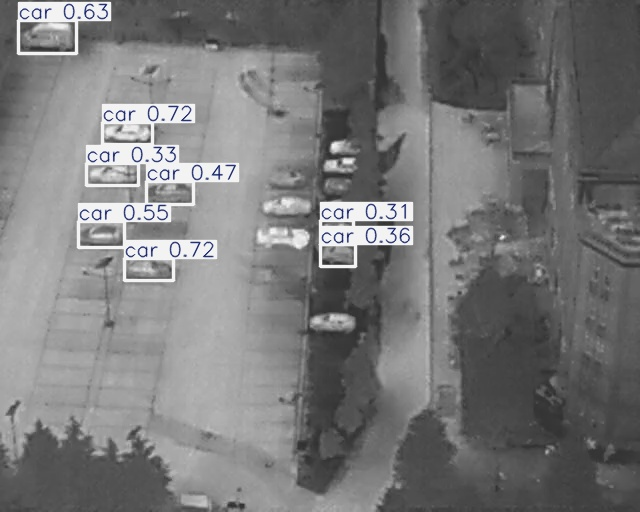

In [14]:
import time
import os
from ultralytics import YOLO
from IPython.display import Image, display

# Load YOLOv10s model (pretrained or fine-tuned)
model = YOLO("yolov10s.pt")  # or your fine-tuned model path

# Image path
img_path = "/content/hit-uav/images/test/0_120_40_0_09471.jpg"  # adjust as needed

# Run inference and save prediction
start = time.time()
results = model(img_path, conf=0.3, save=True)  # ✅ save=True creates annotated image
end = time.time()

print(f"✅ Inference Time: {(end - start) * 1000:.2f} ms")

# Get and display the saved prediction image
pred_dir = results[0].save_dir
pred_img_path = os.path.join(pred_dir, os.path.basename(img_path))

if os.path.exists(pred_img_path):
    display(Image(filename=pred_img_path))
else:
    print("⚠️ Prediction image not found at:", pred_img_path)


In [15]:
import time
import cv2
import numpy as np
from openvino.runtime import Core

# ✅ Load and preprocess the image
image_path = "/content/hit-uav/images/val/0_110_70_0_08469.jpg"
image = cv2.imread(image_path)
pre_start = time.time()
image_resized = cv2.resize(image, (640, 640))
input_tensor = image_resized.transpose(2, 0, 1)[np.newaxis, :] / 255.0
input_tensor = input_tensor.astype(np.float32)
pre_end = time.time()

# ✅ Load OpenVINO model
core = Core()
model_ir_path = "/content/openvino_yolov10s/yolov10s.xml"  # update if needed
compiled_model = core.compile_model(model=model_ir_path, device_name="CPU")
input_layer = compiled_model.input(0)
output_layer = compiled_model.output(0)

# ✅ Run inference
inf_start = time.time()
outputs = compiled_model([input_tensor])[output_layer]
inf_end = time.time()

# ✅ Simulate post-processing time (if you do NMS or decode manually)
post_start = time.time()
# You could implement real decoding logic here if needed
post_end = time.time()

# ✅ Print timing summary
print(f"Inference Time (OpenVINO): {inf_end - inf_start:.5f} sec")
print(f"Speed: {(pre_end - pre_start)*1000:.1f}ms preprocess, {(inf_end - inf_start)*1000:.1f}ms inference, {(post_end - post_start)*1000:.1f}ms postprocess")
print("Output shape:", outputs.shape)


Inference Time (OpenVINO): 0.22129 sec
Speed: 9.3ms preprocess, 221.3ms inference, 0.0ms postprocess
Output shape: (1, 300, 6)


In [ ]:
import shutil
import os
from google.colab import drive

# ✅ Mount Google Drive
drive.mount('/content/drive')

# Define paths
workspace = "/content"
save_dir = "/content/YOLOv10_Final"
os.makedirs(save_dir, exist_ok=True)

# 1️⃣ Copy model weights
shutil.copy(os.path.join(workspace, "yolov10s.pt"), save_dir)
shutil.copy(os.path.join(workspace, "yolov10s.onnx"), save_dir)

# 2️⃣ Copy OpenVINO model folder
ov_folder = os.path.join(workspace, "openvino_yolov10s")
if os.path.exists(ov_folder):
    shutil.copytree(ov_folder, os.path.join(save_dir, "openvino_yolov10s"))

# 3️⃣ Copy training outputs
runs_folder = os.path.join(workspace, "runs", "detect", "yolov10s_run")
if os.path.exists(runs_folder):
    shutil.copytree(runs_folder, os.path.join(save_dir, "runs_yolov10s"))

# 4️⃣ Copy metrics CSV if exists
csv_path = os.path.join(workspace, "results_yolov10.csv")
if os.path.exists(csv_path):
    shutil.copy(csv_path, save_dir)

# 5️⃣ Zip everything
zip_path = "/content/drive/MyDrive/YOLOv10_Final.zip"
shutil.make_archive("/content/YOLOv10_Final", 'zip', save_dir)

print(f"✅ All YOLOv10 results zipped and saved at: {zip_path}")
